# Sound and Wave

In [1]:
%matplotlib inline

import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5')

## Pure sine wave

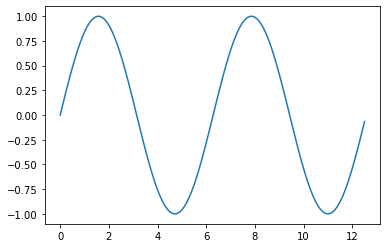

In [2]:
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)
plt.plot(x,y)
plt.show()

## General sine wave

In [3]:
amplitude = 2.0
wavelength = 3.0
phase = 0.0

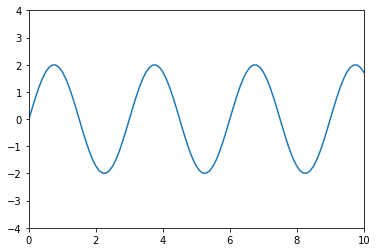

In [4]:
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
k = 2 * np.pi / wavelength
y = amplitude * np.sin(k*x + phase)
plt.plot(x,y)
plt.axis([0,10,-4,4])
plt.show()

<hr>

## Transverse wave propagation

In [5]:
amplitude = 2.0
wavelength = 3.0

In [6]:
%%capture

x = np.arange(0,4*np.pi,0.1)
k = 2 * np.pi / wavelength

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    y = amplitude * np.sin(k* (x-0.1*i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=120, interval=20, blit=True)

In [7]:
HTML(anim.to_jshtml())

In [8]:
%%capture

xp = np.arange(0,4*np.pi,0.5)
k = 2 * np.pi / wavelength

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)
point, = ax.plot([], [], lw=2, marker="o", ls="")

def init():
    line.set_data([], [])
    point.set_data([], [])
    return (line,point,)

def animate(i):
    yp = amplitude * np.sin(k* (xp-0.1*i))
    point.set_data(xp, yp)

    xl=[]
    yl=[]
    for i in range(len(xp)-1):
        xl.append(xp[i])
        yl.append(yp[i])
        xl.append(xp[i])
        yl.append(0)
        xl.append(xp[i+1])
        yl.append(0)
    line.set_data(xl, yl)


    return (line,point,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=120, interval=20, blit=True)

In [9]:
HTML(anim.to_jshtml())

## Longitudinal wave propagation

In [10]:
amplitude = 0.5
wavelength = 3.0

In [11]:
%%capture

xp = np.arange(0,4*np.pi,0.5)
k = 2 * np.pi / wavelength

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=1, marker=".", ls="")


def init():
    line.set_data([],[])
    return (line,)


def animate(i):
    yp = amplitude * np.sin(k* (xp-0.1*i))

    dx = np.tile(xp+yp,5)
    dy = np.repeat([0,0.5,1,-0.5,-1],len(xp))

    line.set_data(dx, dy)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=120, interval=20, blit=True)

In [12]:
HTML(anim.to_jshtml())

<hr>

## Noticeable difference

In [13]:
frequency = 8000
#frequency = 200

difference_in_cents = 10
#difference_in_cents = 100

In [14]:
difference = difference_in_cents * frequency / 1200
wave1 = thinkdsp.sin_wave(frequency,1)
wave2 = thinkdsp.sin_wave(frequency + difference,1)
wave = wave1 | wave2

wave.make_audio()

<hr>

## Simple Harmonic Motion

In [15]:
amplitude = 2.0
frequency = 1.0
phase = 0.0

In [16]:
%%capture

period = 1/frequency
delay = 0.01
frame_num = round(period/delay)
q = 2 * np.pi / frame_num

fig, ax = plt.subplots()
ax.set_xlim(( -6, 6))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], marker=".", lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = amplitude * np.sin(q*i + phase)
    line.set_data(x, 0)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [17]:
HTML(anim.to_jshtml())

<hr>

## Vibrating string of the harmonics

In [18]:
amplitude = 2.0
fundamental_frequency = 1.0
phase = 0.0
harmonic = 1

In [19]:
%%capture

period = 1/(fundamental_frequency * harmonic)
delay = 0.01
frame_num = round(period/delay)
wavelength = 24.0 / harmonic
k = 2 * np.pi / wavelength

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.arange(0,4*np.pi,0.1)
    y = amplitude * np.sin(2*np.pi*i/frame_num + phase) * np.sin(k*x)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [20]:
HTML(anim.to_jshtml())

## Vibrating string of combined harmonics

In [21]:
fundamental_frequency = 1.0
harmonic_amplitude = [1.0, 0.3, 0.2, 0.1]
phase = [0.0, 0.0, 0.0, 0.0]

In [22]:
%%capture

max_harmonic = len(harmonic_amplitude)
period = 1/fundamental_frequency
delay = 0.01
frame_num = round(period/delay)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.arange(0,4*np.pi,0.1)
    y = np.full(len(x),0)
    for h in range(max_harmonic):
        har = h+1
        wavelength = 24.0 / har
        k = 2 * np.pi / wavelength
        y = y + harmonic_amplitude[h] * np.sin(2*np.pi * har*i/frame_num + phase[h]) * np.sin(k*x)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [23]:
HTML(anim.to_jshtml())

## Vibration of air molecule

In [24]:
%%capture

fig, ax = plt.subplots()
ax.set_xlim(( -6, 6))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

line.set_marker(".")

def animate(i):
    x = 0
    for h in range(max_harmonic):
        har = h+1
        x = x + harmonic_amplitude[h] * np.sin(2*np.pi * har*i/frame_num + phase[h])
    line.set_data(x, 0)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [25]:
HTML(anim.to_jshtml())

## Sound wave function

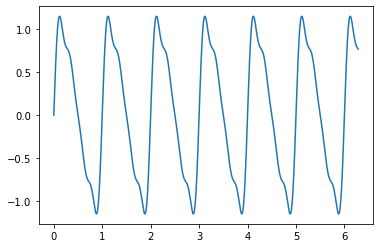

In [26]:
x = np.arange(0,2*np.pi,0.001)   
y = np.full(len(x),0.0)   

for h in range(max_harmonic):
    har = h+1
    freq = har * fundamental_frequency
    k = 2 * np.pi * freq
    y = y + harmonic_amplitude[h] * np.sin(k*x + phase[h])

plt.plot(x,y)
plt.show()

## Sound generated

In [27]:
frequency = 220 * fundamental_frequency
max_amp = max(harmonic_amplitude)
wave = thinkdsp.sin_wave(frequency,2)
wave.scale(harmonic_amplitude[0]/max_amp)

for h in range(1,max_harmonic):
    har = h + 1
    freq = har * frequency
    waveh = thinkdsp.sin_wave(freq,2)
    waveh.scale(harmonic_amplitude[h]/max_amp)
    wave = wave + waveh

wave.normalize()
wave.make_audio()

## Spectrum of Sound

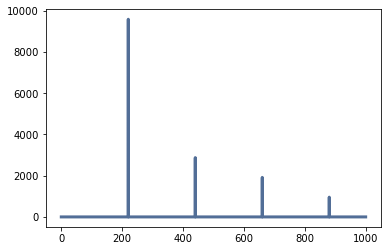

In [28]:
sp = wave.make_spectrum()
sp.plot(high=1000)

<hr>

## Beat frequency

In [29]:
beat_frequency = 1
f1 = 220
f2 = f1 + beat_frequency

In [30]:
wave = thinkdsp.sin_wave(f1, 4)
wave = wave + thinkdsp.sin_wave(f2, 4)
wave.normalize()
wave.make_audio()

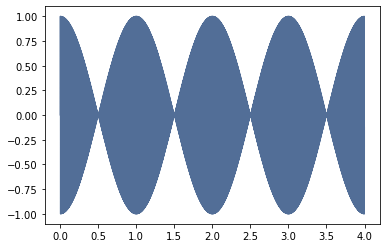

In [31]:
wave.plot(linewidth=1)

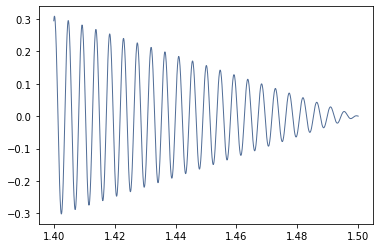

In [32]:
seg = wave.segment(1.4,0.1)
seg.plot(linewidth=1)